<a href="https://colab.research.google.com/github/fclubb/EarthSurfaceProcesses/blob/master/Week3_FluvialIncision/Part2_StreamPower_ANSWERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2: Stream power

*This lesson was originally written by Simon M. Mudd at the University of Edinburgh, modified by Fiona Clubb at Durham University*

__Task:__ Play around with the parameters above to get a feeling for how much relief is generated for different erodibilites and uplift rates. 

__Question__: Set $n$ = 1 and $m$ = 0.45. Use an uplift rate of 0.0005 m/yr and 0.0002 m/yr. What are values of K that give realistic relief? You can go on Google earth to see how long channels are in big mountain ranges and how much relief they have. 

_To answer the question, let's set $n$ and $m$ in the code blocks below and create 2 channels with the different uplift rates. I have set all other parameters to be identical between the two channels_.

_If we use the default $K$ value of 0.00005, you can see that we get quite low elevations. For $U$ = 0.0002 m/yr, this value of $K$ gives a relief (difference in elevation from the start to the end of the profile) of around 20 m, while if $U$ = 0.0005 m/yr, the relief is around 90 m._

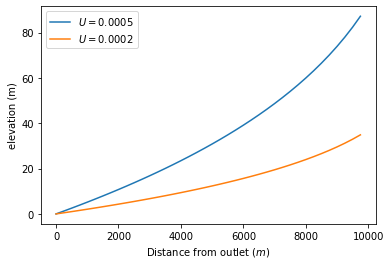

_How does this compare to real mountain ranges? If we look at the Himalayas on Google Earth, we can look at the elevation difference over a similar stretch of channel (10km). I chose to look at the Gandaki river in Nepal which is quite high up in the mountains: there the river drops 286 m in 10 km. To get these values with the specified uplift rates, I had to decrease $K$ to 0.000019 when U = 0.0005 m/yr, and even further to 0.000008 when U = 0.0002 m/yr._

_Why might this be the case? To increase relief along our channel profile, we need to decrease erosion rates. Erosion rates are controlled by the stream power model. Remeber in steady state that:_

$S = \big(\frac{U}{k}\big)^{1/n} A^{-m/n}$

_If we increase $k$, we increase erosion and therefore the channel will cut down and decrease relief (you can see in this equation, this will decrease channel slope). However if we decrease $k$, we are simulating rock that is harder to erode - this decreases erosion and preserves channel relief._

_This is affected by uplift rate, because we are working towards our steady-state solution where erosion will balance uplift. In the equation above, you can see that uplift if on the numerator. If uplift rates are higher, we will increase channel slopes, whereas if uplift rates are slower we will decrease slopes. We can therefore preserve higher channel slopes in more erodible rock, if we've got higher rates of uplift._

First we need to install the package and then import a few other tools.

In [3]:
!pip install channeltoy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import channeltoy as ct
import matplotlib.pyplot as plt
import numpy as np

K is: 1.9e-05
U is: 0.0005
K is: 8e-06
U is: 0.0002


Text(0, 0.5, 'elevation (m)')

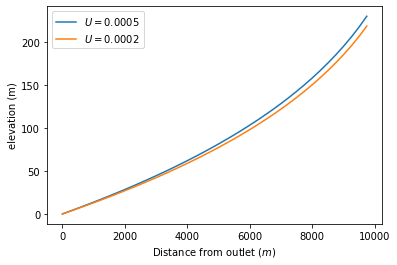

In [9]:
# Set up a first and second channel
first_channel = ct.channeltoy(spacing=250, U=0.0005, K=0.000019, n=1, m=0.45, maximum_x=10000, X_0=12000)

# I show here the setting of steady state but actually this happens automatically when you make a channel. 
initial_elevation = first_channel.solve_steady_state_elevation()

second_channel = ct.channeltoy(spacing=250, U=0.0002, K=0.000008, n=1, m=0.45, maximum_x=10000, X_0=12000)
second_channel.solve_steady_state_elevation() # This isn't really necessary but showing you how to reset a channel to steady state

# Get the data from the two channels
x1 = first_channel.x_data
z1 = first_channel.z_data
x2 = second_channel.x_data
z2 = second_channel.z_data

# Plot the channels
plt.plot(x1,z1,label="$U = 0.0005$")
plt.plot(x2,z2,label="$U = 0.0002$")
plt.legend()

plt.xlabel("Distance from outlet ($m$)")
plt.ylabel("elevation (m)")

## Further reading

Howard, A.D., Kerby, G., 1983. Channel changes in badlands. GSA Bulletin 94, 739–752. https://doi.org/10.1130/0016-7606(1983)94<739:CCIB>2.0.CO;2


Whipple, K.X., Tucker, G.E., 1999. Dynamics of the stream-power river incision model: Implications for height limits of mountain ranges, landscape response timescales, and research needs. Journal of Geophysical Research: Solid Earth 104, 17661–17674. https://doi.org/10.1029/1999JB900120

